In [124]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import cross_val_score

In [125]:
X = pd.read_csv('resampled_data.csv', dtype=np.float32)
df = X.copy()

In [126]:
df['Churn'].value_counts()

Churn
0.0    5163
1.0    5163
Name: count, dtype: int64

In [127]:
x = df.drop('Churn', axis=1)
y = df['Churn']
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=7)

In [128]:
x_test.to_csv("Test Data.csv", index=False)

In [129]:
split = (x_train, x_test, y_train, y_test, x_val, y_val)
for i in split:
    print(i.shape)

(6608, 24)
(2066, 24)
(6608,)
(2066,)
(1652, 24)
(1652,)


In [130]:
scale_pos_weight_value = (y_train.value_counts()[0]) / (y_train.value_counts()[1])

In [131]:
#Randomsearch

# param_grid = {
#     'subsample': np.arange(0.5, 1.0, 0.1),
#     'reg_lambda': [0, 0.1, 1, 10],
#     'reg_alpha': [0, 0.1, 1, 10],
#     'n_estimators' : np.arange(1, 150, 1),
#     'min_split_loss': [0, 0.5, 1],
#     'min_child_weight': [1, 2, 5],
#     'max_depth': [3, 4, 5, 6],
#     'learning_rate': [0.01, 0.05, 0.1, 0.3],
#     'colsample_bytree': np.arange(0.5, 1.0, 0.1),
#     'colsample_bynode': np.arange(0.5, 1.0, 0.1),
#     'colsample_bylevel': np.arange(0.5, 1.0, 0.1)
# }

# xgb_clf = XGBClassifier()

# random_search = RandomizedSearchCV(
#     estimator=xgb_clf,
#     param_distributions=param_grid,
#     n_iter=100,
#     cv=5,
#     random_state=7,
#     n_jobs=-1
# )

# random_search.fit(x_train, y_train)

# for param,value in random_search.best_params_.items():
#     print(f"{param} = {value},")

In [132]:
evalset = [(x_train, y_train), (x_test, y_test)]

In [133]:
#Training the model using best params

new_xgbmodel = XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = ['logloss',"error"],
    subsample = 0.5,
    reg_lambda = 0.1,
    reg_alpha = 1,
    n_estimators = 155,
    min_split_loss = 1,
    min_child_weight = 1,
    max_depth = 6,
    learning_rate = 0.1,
    colsample_bytree = 0.5,
    colsample_bynode = 0.6,
    colsample_bylevel = 0.5,
    scale_pos_weight = scale_pos_weight_value,
    # early_stopping_rounds = 120,
)

#Training Performance
new_xgbmodel.fit(x_train,
                 y_train,
                 eval_set=evalset,
                verbose=True)

#prediction on validation data and test data
val_pred = new_xgbmodel.predict(x_val)
test_pred = new_xgbmodel.predict(x_test)

[0]	validation_0-logloss:0.65148	validation_0-error:0.21610	validation_1-logloss:0.65203	validation_1-error:0.22652
[1]	validation_0-logloss:0.61753	validation_0-error:0.18508	validation_1-logloss:0.61852	validation_1-error:0.19894
[2]	validation_0-logloss:0.58537	validation_0-error:0.17206	validation_1-logloss:0.58753	validation_1-error:0.18877
[3]	validation_0-logloss:0.56007	validation_0-error:0.16828	validation_1-logloss:0.56380	validation_1-error:0.18054
[4]	validation_0-logloss:0.53729	validation_0-error:0.16450	validation_1-logloss:0.54198	validation_1-error:0.17812
[5]	validation_0-logloss:0.51663	validation_0-error:0.16087	validation_1-logloss:0.52159	validation_1-error:0.17425
[6]	validation_0-logloss:0.50179	validation_0-error:0.15799	validation_1-logloss:0.50737	validation_1-error:0.16844
[7]	validation_0-logloss:0.48300	validation_0-error:0.15542	validation_1-logloss:0.48992	validation_1-error:0.16893
[8]	validation_0-logloss:0.46790	validation_0-error:0.15421	validation_1

[57]	validation_0-logloss:0.29176	validation_0-error:0.12621	validation_1-logloss:0.31966	validation_1-error:0.14376
[58]	validation_0-logloss:0.29147	validation_0-error:0.12666	validation_1-logloss:0.31933	validation_1-error:0.14230
[59]	validation_0-logloss:0.29054	validation_0-error:0.12682	validation_1-logloss:0.31860	validation_1-error:0.14037
[60]	validation_0-logloss:0.28933	validation_0-error:0.12485	validation_1-logloss:0.31794	validation_1-error:0.13843
[61]	validation_0-logloss:0.28888	validation_0-error:0.12500	validation_1-logloss:0.31782	validation_1-error:0.14037
[62]	validation_0-logloss:0.28743	validation_0-error:0.12561	validation_1-logloss:0.31718	validation_1-error:0.14134
[63]	validation_0-logloss:0.28687	validation_0-error:0.12545	validation_1-logloss:0.31674	validation_1-error:0.14279
[64]	validation_0-logloss:0.28616	validation_0-error:0.12545	validation_1-logloss:0.31628	validation_1-error:0.14327
[65]	validation_0-logloss:0.28526	validation_0-error:0.12576	val

In [134]:
#model evaluation
print(f"Test Accuracy :{accuracy_score(y_test, test_pred)}")
print(f"Validation Accuracy :{accuracy_score(y_val, val_pred)}")
print(f"Classification Report: \n{classification_report(y_val, val_pred)}")
print(f'Confusion Matrix on Validation set: \n{confusion_matrix(y_val, val_pred)}')
print(f'Confusion Matrix on Test set: \n{confusion_matrix(y_test, test_pred)}')

Test Accuracy :0.861568247821878
Validation Accuracy :0.8631961259079903
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       804
         1.0       0.87      0.86      0.87       848

    accuracy                           0.86      1652
   macro avg       0.86      0.86      0.86      1652
weighted avg       0.86      0.86      0.86      1652

Confusion Matrix on Validation set: 
[[698 106]
 [120 728]]
Confusion Matrix on Test set: 
[[926 132]
 [154 854]]


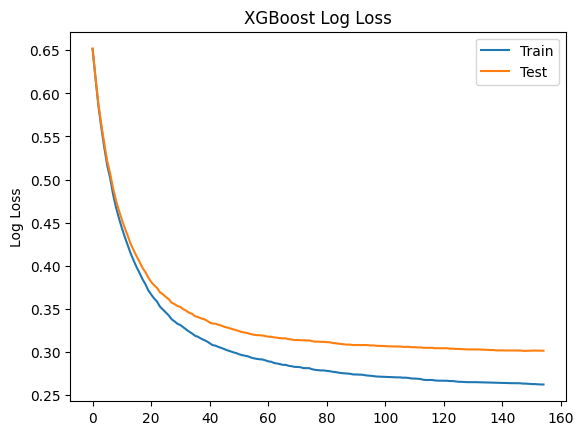

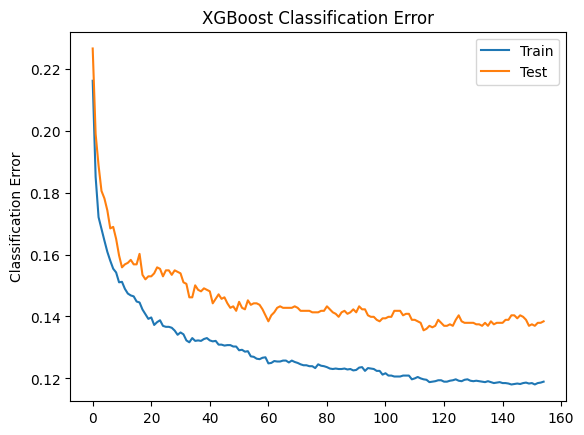

In [135]:
from matplotlib import pyplot
results = new_xgbmodel.evals_result()

epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test',)
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

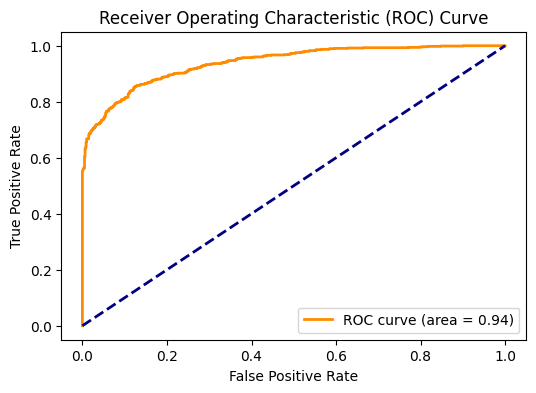

In [136]:
#ROC AUC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

val_probabilities = new_xgbmodel.predict_proba(x_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, val_probabilities)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [137]:
#kfold
from sklearn.model_selection import StratifiedKFold
import numpy as np

num_folds = 5

kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=7)

for fold, (train_idx, val_idx) in enumerate(kf.split(x_train, y_train), 1):
    print(f"Training on Fold {fold}....")

    x_fold_train, y_fold_train = x_train.iloc[train_idx], y_train.iloc[train_idx]
    x_fold_val, y_fold_val = x_train.iloc[val_idx], y_train.iloc[val_idx]

    val_pred_fold = new_xgbmodel.predict(x_fold_val)

    accuracy= accuracy_score(y_fold_val, val_pred_fold)
    print(f"Validation Accuracy on Fold {fold}: {accuracy}")
    print(f"Classification Report on Fold {fold}: \n{classification_report(y_fold_val, val_pred_fold)}")
    print(f"Confusion MAtrix on Fold {fold}: \n{confusion_matrix(y_fold_val, val_pred_fold)}")

Training on Fold 1....
Validation Accuracy on Fold 1: 0.8789712556732224
Classification Report on Fold 1: 
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       661
         1.0       0.89      0.86      0.88       661

    accuracy                           0.88      1322
   macro avg       0.88      0.88      0.88      1322
weighted avg       0.88      0.88      0.88      1322

Confusion MAtrix on Fold 1: 
[[591  70]
 [ 90 571]]
Training on Fold 2....
Validation Accuracy on Fold 2: 0.8782148260211801
Classification Report on Fold 2: 
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       660
         1.0       0.90      0.85      0.87       662

    accuracy                           0.88      1322
   macro avg       0.88      0.88      0.88      1322
weighted avg       0.88      0.88      0.88      1322

Confusion MAtrix on Fold 2: 
[[600  60]
 [101 561]]
Training on Fold 3....
Valid

In [138]:
test_pred = new_xgbmodel.predict(x_test)

print(f"\nFinal Evaluation on Test Set:")
print(f"Test Accuracy:  {accuracy_score(y_test, test_pred)}")
print(f"Classification Report:\n{classification_report(y_test, test_pred)}")
print(f'Confusion Matrix on Test set:\n{confusion_matrix(y_test, test_pred)}')


Final Evaluation on Test Set:
Test Accuracy:  0.861568247821878
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1058
         1.0       0.87      0.85      0.86      1008

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066

Confusion Matrix on Test set:
[[926 132]
 [154 854]]


Classification Report:
Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. In your case, for class 0 (not churned), the precision is 0.90, and for class 1 (churned), it's 0.54. This means that when the model predicts a customer will churn (class 1), it is correct 54% of the time, and when it predicts a customer will not churn (class 0), it is correct 90% of the time.

Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to the total actual positives. For class 0, the recall is 0.74, and for class 1, it's 0.78. This indicates that the model is able to capture 74% of actual non-churned customers and 78% of actual churned customers.

F1-Score: The F1-score is the weighted average of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.81, and for class 1, it's 0.63.

Support: The number of actual occurrences of each class in the specified dataset

In [139]:
probability = new_xgbmodel.predict_proba(x_test.iloc[1:2])
print(probability)
prediction = new_xgbmodel.predict(x_test.iloc[1:2])
print(prediction)

[[0.98668444 0.01331555]]
[0]


Column 1 represents the probability assigned to the first class (usually the negative class or class 0).  
Column 2 represents the probability assigned to the second class (usually the positive class or class 1)

In [140]:
# import joblib
# joblib.dump(new_xgbmodel, "XGB Model.pkl")

In [141]:
pred = new_xgbmodel.predict(x_test)

In [142]:
num_zeros = np.sum(pred == 0)
num_ones = np.sum(pred == 1)
print(f'Zeroes : {num_zeros}')
print(f'Ones : {num_ones}')

Zeroes : 1080
Ones : 986


In [143]:
import json
eval_results = new_xgbmodel.evals_result()
result_json = {
    "train": {
        "logloss": eval_results['validation_0']['logloss'],
        "error": eval_results['validation_0']['error']
    },
    "eval": {
        "logloss": eval_results['validation_1']['logloss'],
        "error": eval_results['validation_1']['error']
    }
}
with open('eval_results.json', 'w') as f:
    json.dump(result_json, f)